## Regression - 1

### Using sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

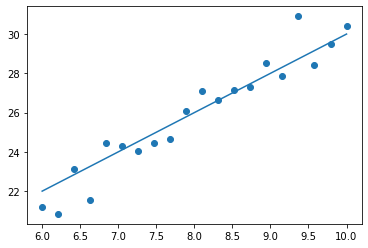

In [2]:
# Generate data
x = np.linspace(6, 10, 20)
y = 2 * x + 10 + np.random.normal(0, 1, x.size)

plt.scatter(x, y)
plt.plot(x, 2 * x + 10)

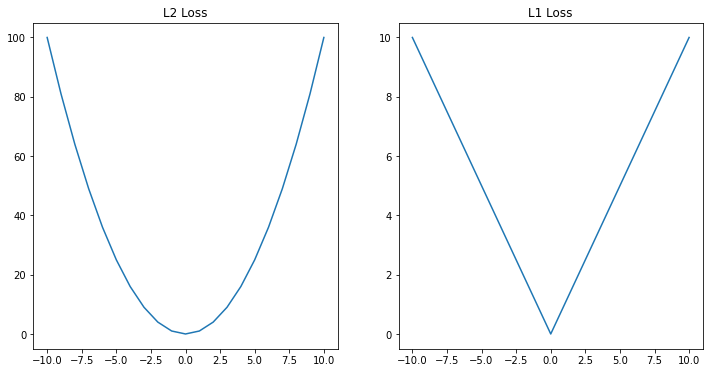

In [3]:
x = np.arange(-10, 11)

plt.figure(figsize=(12, 6))

# Plot l2 loss
plt.subplot(1, 2, 1)
plt.title("L2 Loss")
plt.plot(x, x ** 2)

# Plot l1 loss
plt.subplot(1, 2, 2)
plt.title("L1 Loss")
plt.plot(x, np.abs(x))

The regression line is y = 1.8288696241026052x + 10.882009997256013


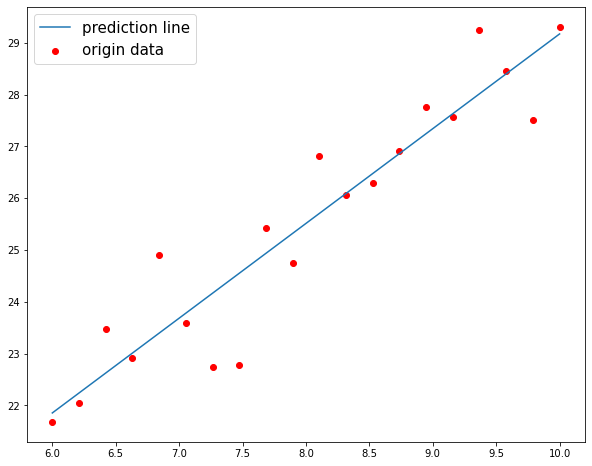

In [4]:
# import scikit learn package
from sklearn.linear_model import LinearRegression

# generate data
x = np.linspace(6, 10, 20)
y = 2 * x + 10 + np.random.normal(0, 1, x.size)

# Create an linear regression omptimizer 
# Data of x should be in 2d, so we should add new axis to x
reg = LinearRegression().fit(x[:, np.newaxis], y)

print(f"The regression line is y = {reg.coef_[0]}x + {reg.intercept_}")

plt.figure(figsize=(10, 8))

# Plot the scatter plot for origin data
plt.scatter(x, y, c="red", label="origin data")
# Plot the prediction line
plt.plot(x, reg.coef_[0] * x + reg.intercept_, label="prediction line")

# For showing the labels
plt.legend(prop={'size': 15})

### Multinomial regression

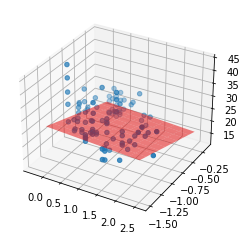

In [5]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d

# Get boston dataset and leave only 2 features
data = datasets.load_boston()
x = pd.DataFrame(data.data, columns=data.feature_names)
x = x.loc[:, ["DIS", "NOX",]]

# Normalize the data
x = StandardScaler().fit_transform(x)[:100]

# Fit the data to Linear Regression model
model = LinearRegression().fit(x, data.target[:100])

# 3d plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x[:, 0], x[:, 1], data.target[:100])
xx, yy = np.meshgrid(np.linspace(0, 2.5, 10), np.linspace(-0.2, -1.5, 10))
ax.plot_surface(xx, yy,
                xx * model.coef_[0] + yy * model.coef_[1] + model.intercept_, 
                color="red",
                alpha=0.5)

### Polynomial regression

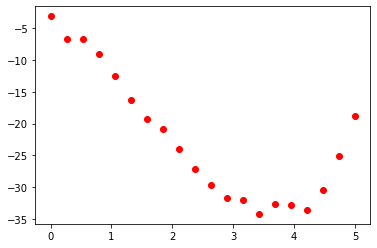

In [6]:
X = np.linspace(0, 5, 20)
y = (X ** 3) - 5 * (X ** 2)  - 3 * X - 5

plt.scatter(X, y + np.random.randn(X.size), c="red")

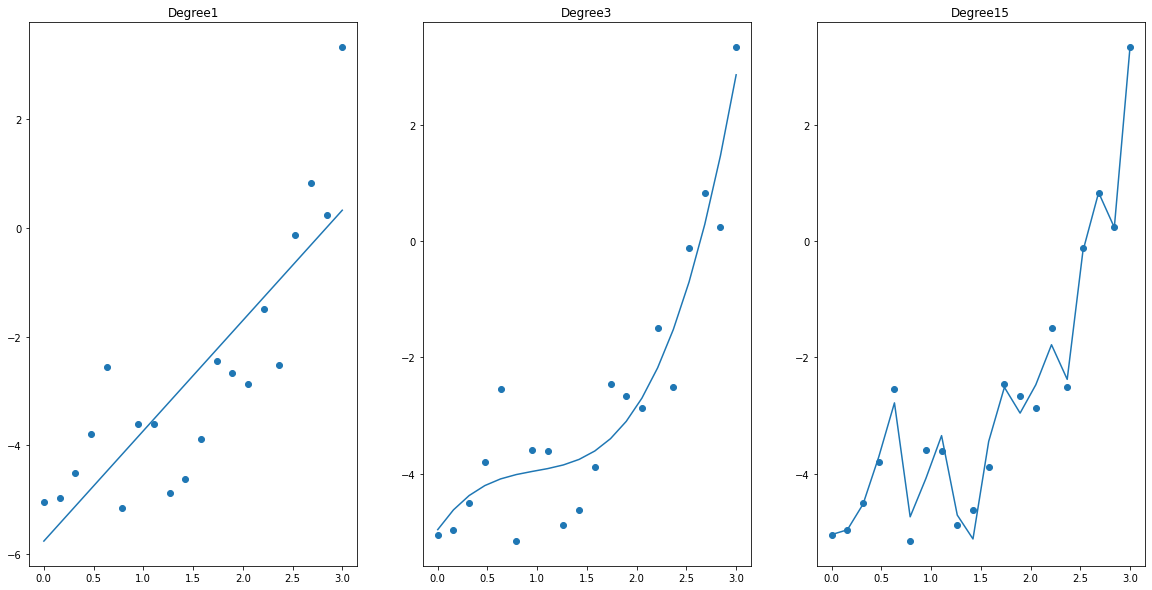

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate data points
X = np.linspace(0, 3, 20)
y = (X ** 3) - 3 * (X ** 2) + 3 * X - 5 + np.random.randn(X.size)

# Set different degree
degrees = [1, 3, 15]

plt.figure(figsize=(20, 10))

count = 1
for degree in degrees:
    # Transfrom x to [1, x, x^2, x^3, ...]
    x = PolynomialFeatures(degree).fit_transform(X[:, np.newaxis])
    
    # Using linear gression to predict the model
    model = LinearRegression().fit(x, y)
    
    plt.subplot(1, 3, count)
    plt.title("Degree{}".format(degree))
    # Origin points
    plt.scatter(X, y)
    # Predict points
    plt.plot(X, model.predict(x))
    
    # Next plot
    count += 1

## Regression - 2

### Make our own gradient descent

In [8]:
def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    input:
        X: data (2D array)
        y: labels for each data (1D array)
        theta: param (1D array)
        alpha: learning rate (int)
        num_iters: total iterations to update theta (int)
    
    Target:
        This function is used to update theta by gradient descent
    
    return:
        theta: Final parameters(1D array)
        J_history: Loss function of each history (2D array)  
    '''
    # Get the cost of lost function in each iteration
    J_history = np.zeros(num_iters)
    
    # Start gradient descent
    for i in range(0, num_iters):
        grad = np.dot(X, theta.T) - y
        grad = np.multiply(X.T, grad).T
        grad = np.mean(grad, axis=0)
        
        theta = theta - alpha * grad

        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

def compute_cost(X, y, theta):
    '''
    Input:
        X: numpy array
        y: labels
    
    Use:
        Get the cost of loss function
        
    Return
        Loss for each iteration (Int)
    '''
    cost = y - np.dot(X, theta.T)
    cost = cost * cost
    cost = cost / 2

    return np.mean(cost)

In [9]:
# Generate data
x = np.linspace(6, 10, 20)
y = 2 * x + 10 + np.random.normal(0, 1, x.size)

# Add a column of ones to x
X = np.c_[np.ones(y.shape[0]), x]

# Initialize theta
theta = np.zeros(X.shape[1])

# Run for 15000 iters
iters = 15000
# Learning rate
alpha = 0.01

In [10]:
# Get theta
theta, J_history = gradient_descent(X, y, theta, alpha, iters)

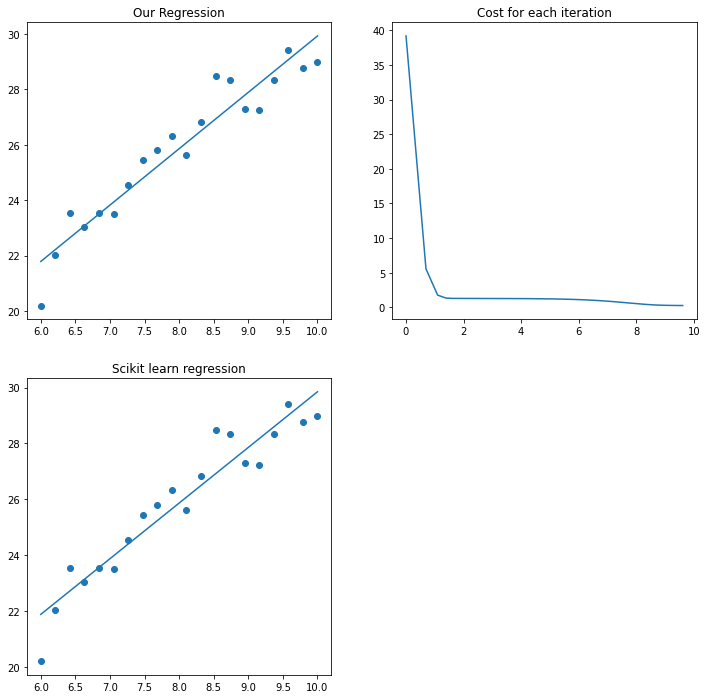

In [11]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12, 12))

# Draw our custom regression line
plt.subplot(2, 2, 1)
plt.title("Our Regression")
plt.scatter(x, y)
plt.plot(x, theta[0] + x * theta[1])

# Draw the cost for each iteration
plt.subplot(2, 2, 2)
plt.title("Cost for each iteration")
plt.plot(np.log(np.arange(1, iters + 1)), J_history)

# Draw the scikit-learn regression line
model = LinearRegression().fit(X, y)
plt.subplot(2, 2, 3)
plt.title("Scikit learn regression")
plt.scatter(x, y)
plt.plot(x, model.predict(X))

## Regression - 3

### Using normal equation

In [12]:
def normal_eqn(X, y):
    '''
    Input:
        X: data (2D array)
        y: labels (1D array)
    
    Use: 
        Return \theta by normal equation
    
    Output
        theta: param for regression (1D array)
    '''

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

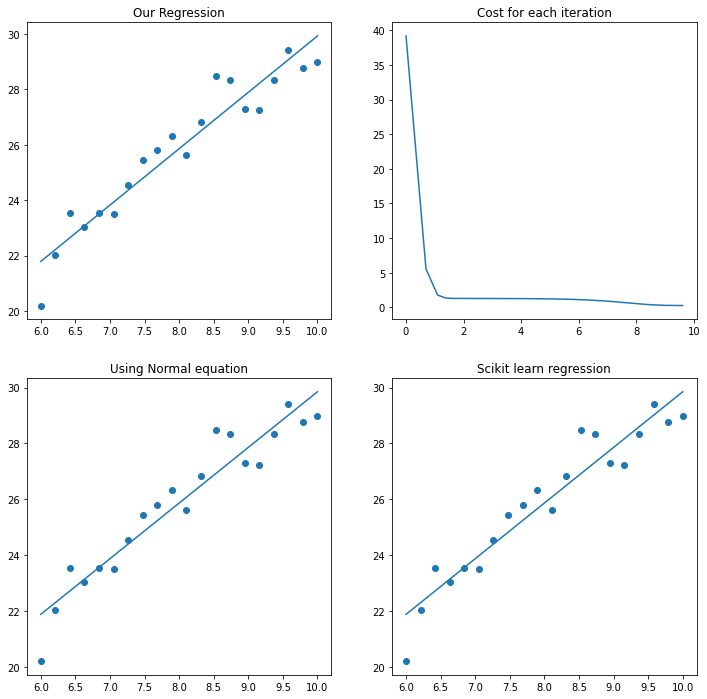

In [13]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12, 12))

# Draw our custom regression line
plt.subplot(2, 2, 1)
plt.title("Our Regression")
plt.scatter(x, y)
plt.plot(x, theta[0] + x * theta[1])

# Draw the cost for each iteration
plt.subplot(2, 2, 2)
plt.title("Cost for each iteration")
plt.plot(np.log(np.arange(1, iters + 1)), J_history)

# Draw the scikit-learn regression line
theta = normal_eqn(X, y)
plt.subplot(2, 2, 3)
plt.title("Using Normal equation")
plt.scatter(x, y)
plt.plot(x, theta[0] + theta[1] * x)

# Draw the scikit-learn regression line
model = LinearRegression().fit(X, y)
plt.subplot(2, 2, 4)
plt.title("Scikit learn regression")
plt.scatter(x, y)
plt.plot(x, model.predict(X))